In [38]:
# read features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from read_json import as_json, plot_histogram
import numpy as np

In [23]:
## merge all resampled data from all servers
develop = pd.read_csv("resampled/develop_resampled.csv"         , index_col=0)
produccion = pd.read_csv("resampled/preproduccion_resampled.csv", index_col=0)
preproduccion = pd.read_csv("resampled/produccion_resampled.csv", index_col=0)
pruebas = pd.read_csv("resampled/pruebas_resampled.csv"         , index_col=0)
qaserver = pd.read_csv("resampled/qaserver_resampled.csv"       , index_col=0)

develop["host"] = "DEVELOP"
produccion["host"] = "PRODUCCION"
preproduccion["host"] = "PREPRODUCCION"
pruebas["host"] = "PRUEBAS"
qaserver["host"] = "QASERVER"

data_full = pd.concat([develop,produccion,preproduccion,pruebas,qaserver])
data_full.sort_index(inplace=True)
data_full.columns


Index(['cores', 'user_pct', 'idle_pct', 'system_pct', 'actual_used_bytes',
       'actual_used_pct', 'swap_free', 'swap_total', 'free', 'swap',
       'bytes_total', 'bytes_total_norm', 'swap_norm', 'out_bytes',
       'out_bytes_norm', 'in_bytes', 'in_bytes_norm', 'host'],
      dtype='object')

[Text(0.5, 1.0, 'CPU')]

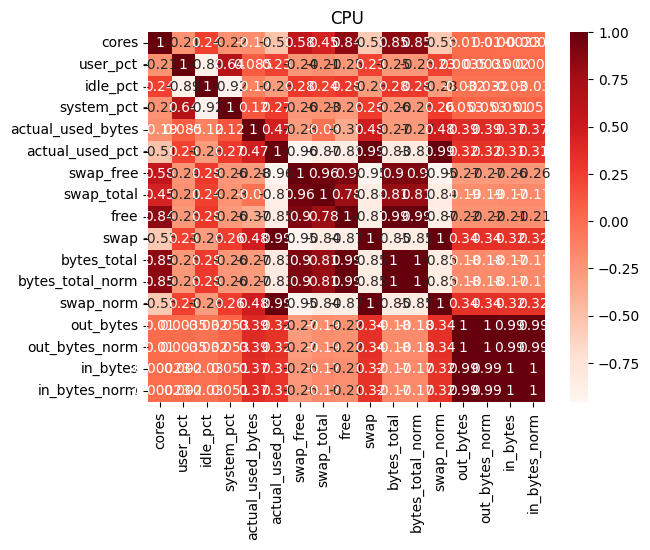

In [60]:
#df.loc[:, df.columns!='column1']
#plt.matshow(data_full.loc[:,data_full.columns!="host"].corr(), )
sb.heatmap(data_full.loc[:,data_full.columns!="host"].corr(), cmap="Reds", annot=True).set(title='CPU')

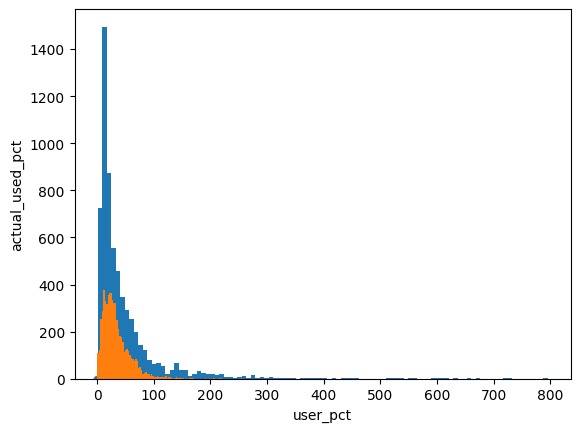

In [63]:
sb.scatterplot(data=data_full, x="user_pct", y="actual_used_pct")
mem_cpu = np.array(data_full.actual_used_pct/data_full.user_pct)
mem_cpu_system = np.array(data_full.actual_used_pct/data_full.system_pct)
plt.hist(mem_cpu[~np.isnan(mem_cpu) * ~np.isinf(mem_cpu)], bins =100 );
plt.hist(mem_cpu_system[~np.isnan(mem_cpu_system) * ~np.isinf(mem_cpu_system)], bins =100 );

